# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

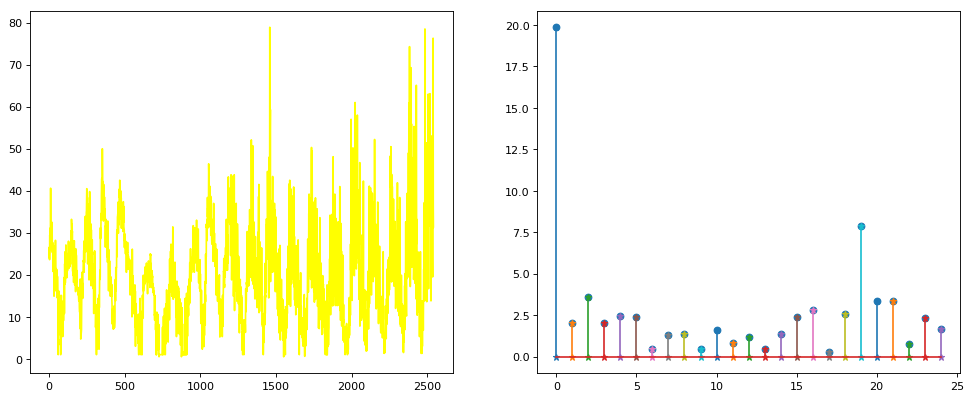

0.00747442958301
11.149122807


In [46]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

arr=[float(x) for x in open('spots.txt').read().split()]

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)

n = int(len(arr))
base_t = np.arange(n)
ax.plot(base_t, arr, linestyle='-', color='yellow')

freqs = range(n)
signal1 = abs(fft(arr)) /(0.5*len(freqs))
signal1[0] = signal1[0] / 2
maximum = 0
ind = 0
for i in range(1,int(len(freqs)/2)):
    if signal1[i] > maximum:
        maximum = signal1[i]
        ind = i

ax = fig.add_subplot(122)
stem(freqs[:25], signal1[:25], '-*')

show()

w = 1
f = ind / n * w
T = 1.0 / (12*f)
print(f)
print(T)

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

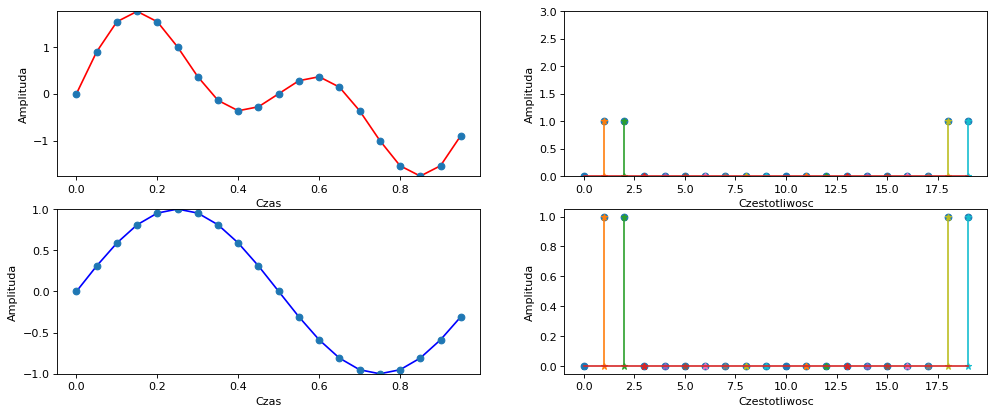

In [47]:
def makeSignal(A=1,LP=1,w=20,f=1):


    T = 1.0/f       

    TW = 1.0/w      

    t = np.arange(0, LP*T, TW)

    n = len(t)

    FUNC = lambda t : (A*sin(2*pi*t*f))+(A*sin(4*pi*t*f))   

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(221)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/20.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signalAfter=signal1
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x /n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(222)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")
    
    ax = fig.add_subplot(223)
    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    for i, f in enumerate(freqs):
        if f ==2:
            signalAfter[i] =0
            signalAfter[-i] =0
    signal=ifft(signalAfter).real
    ax.plot(base_t, signal, linestyle='-', color='blue')
    ax.set_ylim([min(signal), max(signal)])
    ax.plot(t, signal, 'o')
    
    ax = fig.add_subplot(224)
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")
    
    show()
makeSignal()

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

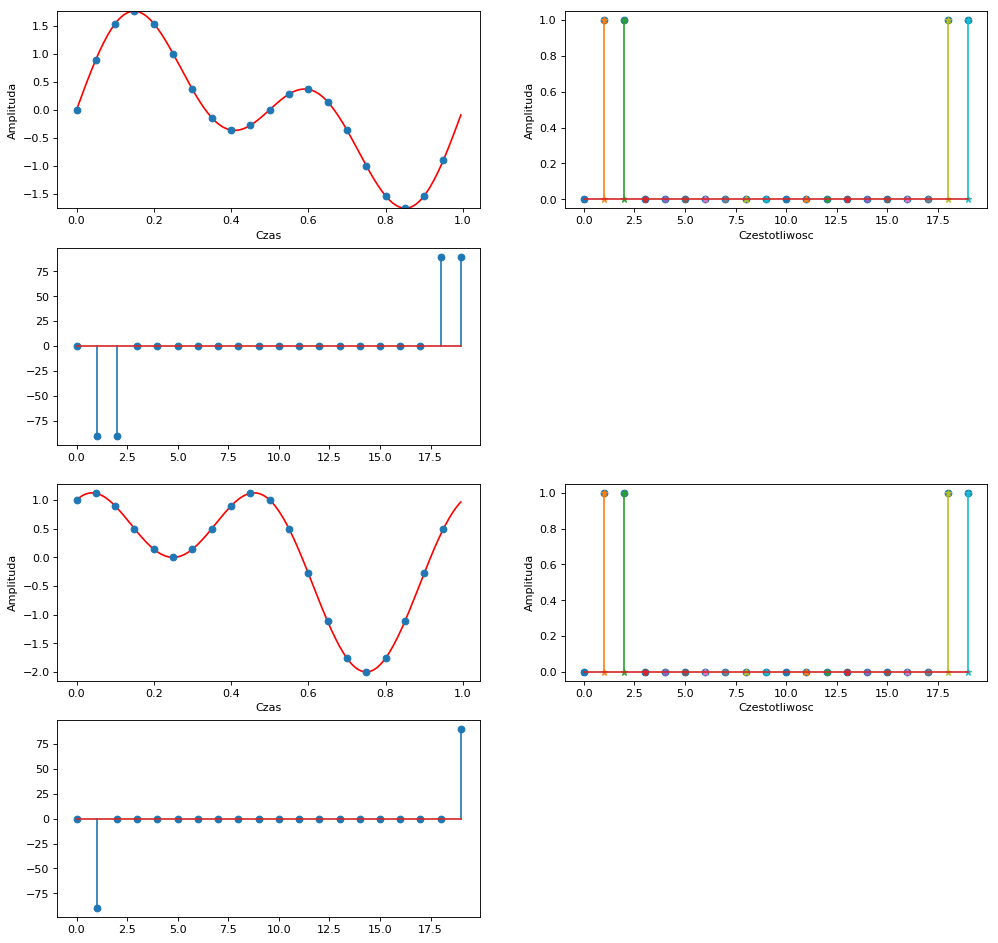

In [50]:
def makeSignal(A=1,LP=1,w=20,f=1):

    T = 1.0/f       
    TW = 1.0/w      
    t = np.arange(0, LP*T, TW)
    n = len(t)

    FUNC = lambda t : (A*sin(2*pi*t*f))+(A*sin(4*pi*t*f))   

    signal = FUNC(t)   

    fig = plt.figure(figsize=(15, 15), dpi=80) 
    ax = fig.add_subplot(421)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signalAfter=signal1
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [ x / n * w for x in freqs ]


    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(422)
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(423)
    
    signalAfter = [(number if abs(imag(number)) > 0.01 else 0) for number in signalAfter]
    ax.stem(freqs, angle(signalAfter, True))
    ax = fig.add_subplot(425)
    
    FUNC = lambda t : (A*sin(2*pi*t*f))+(A*cos(4*pi*t*f))   

    signal = FUNC(t)  
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    
    signalAfter=signal1
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    ax.set_xlabel("Czas")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(426)
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc")
    ax.set_ylabel("Amplituda")
    ax = fig.add_subplot(427)
    
    signalAfter = [(num if abs(imag(num)) > 0.01 else 0) for num in signalAfter]
    
    ax.stem(freqs, angle(signalAfter, True))

    show()
    
    
makeSignal()



# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


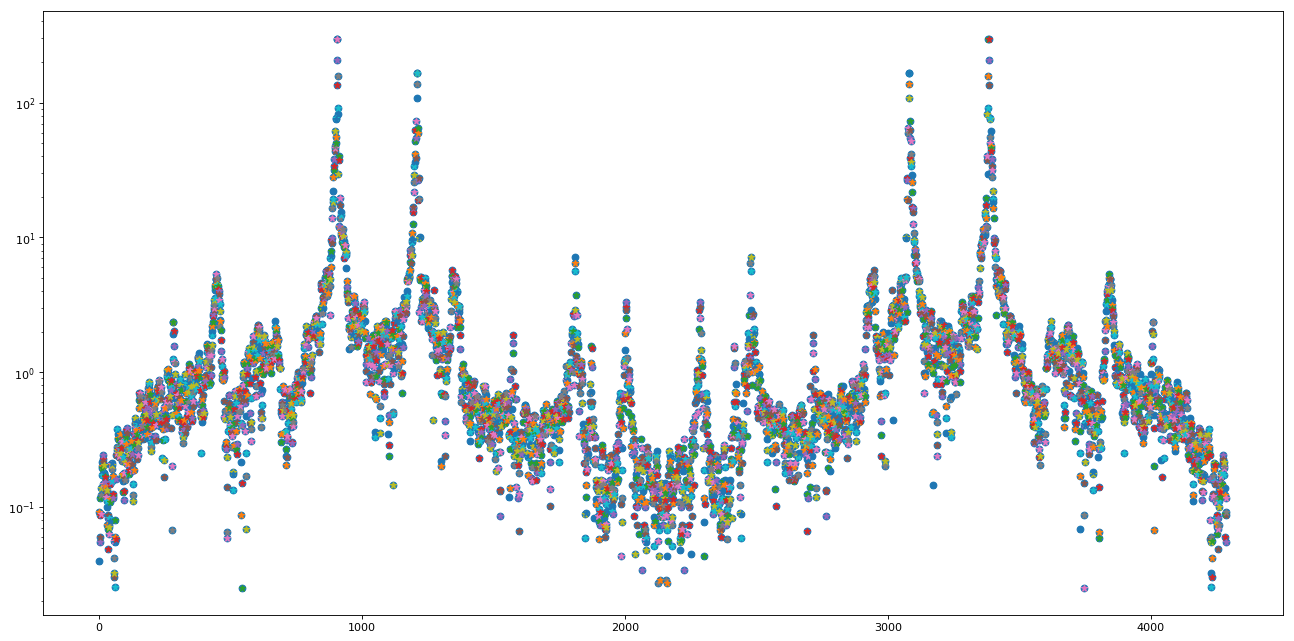

906
Most frequent frequence: 931.777052239


In [44]:
import scipy.io.wavfile
from collections import Counter

w, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal]
signal = signal[::10]

fig_plot = plt.figure(figsize=(20, 10), dpi=80)  

yscale('log')

base_t = np.arange(len(signal))

freqs = range(len(signal))
signal1 = abs(fft(signal)) /(0.5*len(freqs))
signal1[0] = signal1[0] / 2

maxValue = 0
ind = 0
for i in range(1,int(len(signal1))):
    if signal1[i] > maxValue:
        maxValue = signal1[i]
        ind = i
        
f = 0.1 * ind / len(signal) * w
T = 1.0 / f

stem(freqs, signal1, '*')

show()

print(ind)
print('Most frequent frequence: ' + f.__str__())